<a href="https://colab.research.google.com/github/MrSaeidSeyfi/UnsplashImagePicker/blob/main/UnsplashImagePicker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title load image
import urllib.request
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def LoadImage(url):
    url_response = urllib.request.urlopen(url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1) 
    return img

30


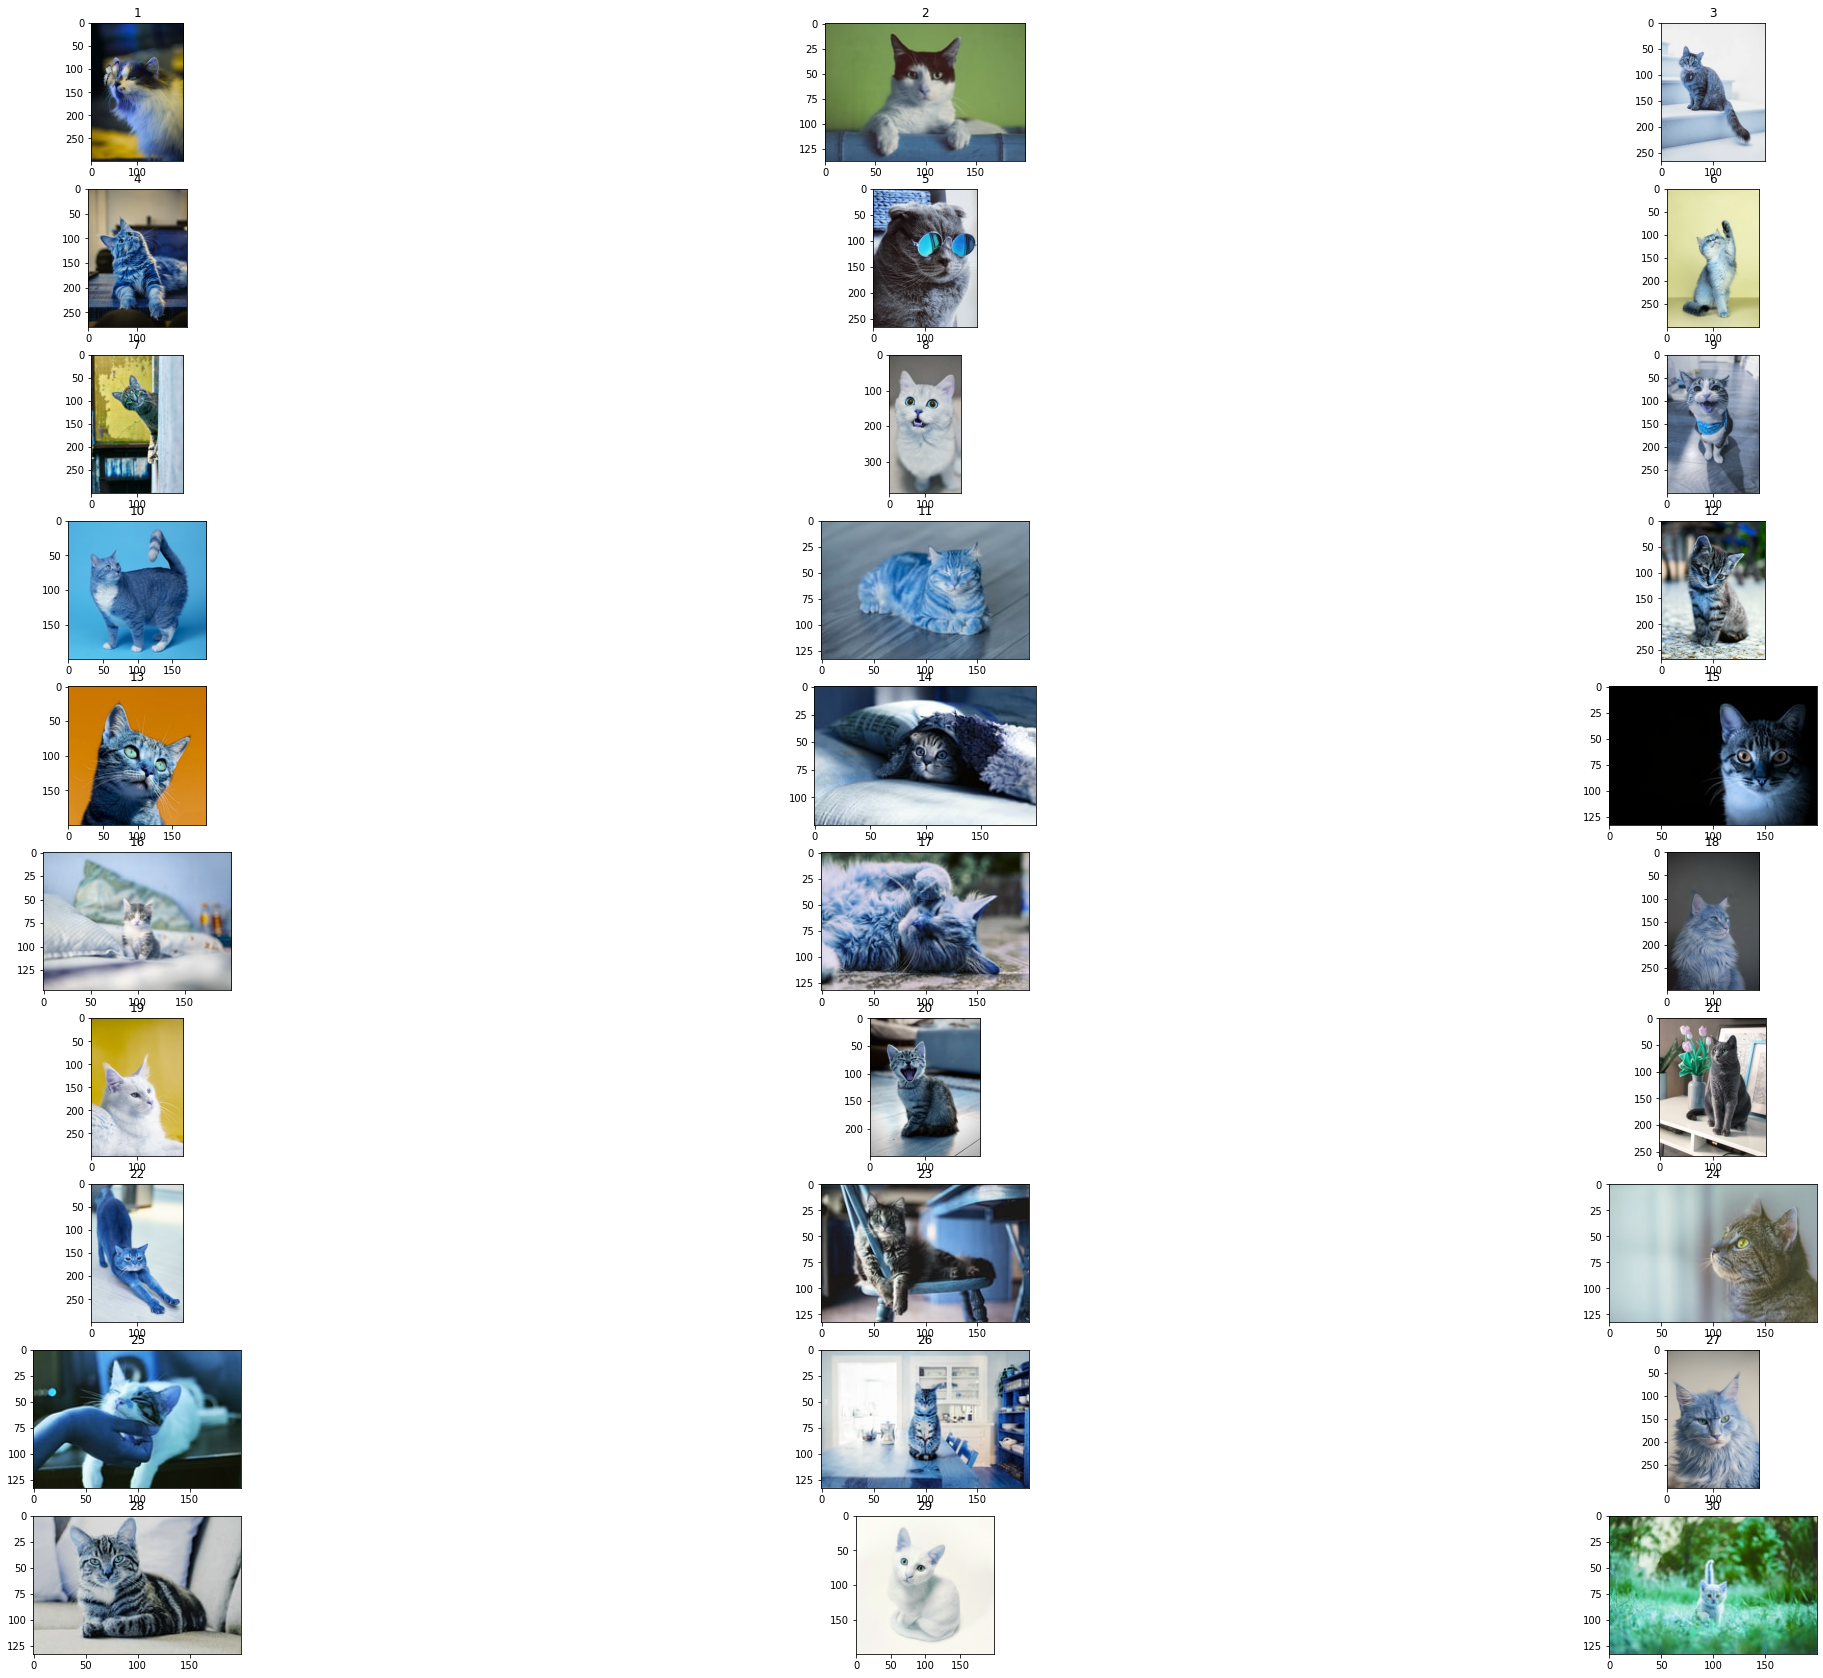

In [3]:
#@title Get image from url
import requests
from random import randint
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import math
query="cat"
clientid="YOUR CLIENT ID"
url = "https://api.unsplash.com/search/photos?client_id="+clientid+"&query="+query+"&page=1&per_page=100"
training_images=[]

headers = {
  'Accept-Version': 'v1'
}

response = requests.request("GET", url, headers=headers)
 
# Display the best matching points
cols = 3
rows = math.ceil((len(response.json()['results']) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(40,30))
 
l = 0
for i in range(rows):
    for j in range(cols):
        if len(response.json()['results']) == l:
            break
        else: 
            axes[i,j].set_title(l+1)
            img= LoadImage(response.json()['results'][l]['urls']['thumb'])
            axes[i,j].imshow(img)
            training_images.append(img)
            l=l+1
            
